# Video Games Sales and Trends
Author: Foster Russell
## Introduction
The Videogame market has grown tremendously from the time videogames were first release in the 80's to present day. In this analysis we will look at trends such as quantity of games, sales, and reviews. We will also investigate the competition between the four major platforms, Ninthendo, Sony, Microsoft, and PC

## Outline
1. Getting Started<br>
    1.1 Required Libraries<br>
    1.2 Dataset Source<br>
    1.3 Load and View Data<br>
2. Data Exploration and Manipulation<br>
3. Data Visualization and Analysis<br>
   3.1 Game Quantity Per Year<br>
   3.2 Sales Per Year<br>
   3.3 Sales Per Game Count Trends<br>
   3.4 Genre Distribution<br>
   3.5 Genre Sales Per Region<br>
   3.6 Critic and User Score Trends<br>
4. Conclusion

# 1. Getting Started
## 1.1 Required Libraries
* Pandas: data display and manipulation
* Seaborn: data visualization
* Numpy 
* Matplotlib: Plot pandas data

In [279]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## 1.2 Dataset Source
The dataset used is from [Kaggle.com](https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings/home). The dataset conatins information about each game, sales figures, and review ratings. Initially, I was going to use [this](https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings/home) dataset which is the same as the dataset we will be using, minus the review ratings. The extra data will lead to more interesting and deeper analysis. However, this dataset does only has reviews for ~6,900 games(out of 16719) so we will have to do some data manipulation before analysis.
<br>
### Columns
* Index: ranking for game based on global sales
* Name
* Platform
* Year of Release
* Publisher
* North America Sales
* European Union Sales
* Japan Sales
* Other Sales
* Global Sales (Sum of the previous four sales)
* Critic Score
* Critic Count
* User Score
* User Count
* Developer
* Age Rating

# 1.3 Load and View Data
Load the .csv file names 'vgsales.csv' and display the first 10 rows

In [153]:
vg = pd.read_csv('vgsales.csv')
vg.head(20)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


# 2. Data Exploration and Manipulation


After initially looking at the data, I noticed that Grand Theft Auto V had PS3 for its platform even though it was sold on multiple platforms so I check that each platform has its own row. Luckily, they do. This was the first step I took after getting the data because if, for some reason, games that were released on multiple platforms were grouped into one platform, the data would be incorrect and not worth analyzing.

In [154]:
vg[vg['Name']=='Grand Theft Auto V']

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.02,9.09,0.98,3.96,21.04,97.0,50.0,8.2,3994.0,Rockstar North,M
23,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.66,5.14,0.06,1.41,16.27,97.0,58.0,8.1,3711.0,Rockstar North,M
42,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.96,6.31,0.38,1.97,12.61,97.0,66.0,8.3,2899.0,Rockstar North,M
165,Grand Theft Auto V,XOne,2014.0,Action,Take-Two Interactive,2.81,2.19,0.00,0.47,5.48,97.0,14.0,7.9,764.0,Rockstar North,M
1730,Grand Theft Auto V,PC,2015.0,Action,Take-Two Interactive,0.39,0.69,0.00,0.09,1.17,96.0,57.0,7.9,3756.0,Rockstar North,M


Check the data types to make sure quantitative columns are floats and qualitative columns are objects. Notice that User_Score is an object when it should be a float so we need to change it. Also notice that critic scores seem to be out of 100 whereas user scores are out of 10, so we will scale the user scores by a factor of 10 to make it consistant with critic score, which will make analysis easier.

In [155]:
vg.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

In [156]:
score = []
for i,row in vg.iterrows():
    userScore = row['User_Score']
    if not (userScore == 'NaN' or userScore == 'tbd'):
        userScore = float(userScore) * 10
        score.append(userScore)
    else:
        score.append(float('nan'))
vg['User_Score'] = score
vg.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,80.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,83.0,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,80.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


Drop the games released before 2000 and after 2015. By 2000, the 4 major platforms (Nintendo, Sony, Microsoft, and PC) had all emerged and started to release games. Since this analysis will focus on the competition between these 4 platforms, the years before all 4 platforms entered the market is not needed. In the [discussion thread](https://www.kaggle.com/gregorut/videogamesales/discussion/43503) for the dataset, a user asked when the dataset was released but did not get a response. He noted that it was last updated in October, 2016 so I assume that's when the data was collected. Since the dataset does not have information for all of 2016, I dropped games from 2016 and after, especially because the holiday season has peak game sales.

In [157]:
vg = vg[vg['Year_of_Release'] >= 2000]
vg = vg[vg['Year_of_Release'] < 2016]
#check max and min to make sure it worked
vg['Year_of_Release'].describe()

count    13968.000000
mean      2007.735610
std          3.890944
min       2000.000000
25%       2005.000000
50%       2008.000000
75%       2011.000000
max       2015.000000
Name: Year_of_Release, dtype: float64

Next, lets add a column called Gen_Platform since many of the platforms are newer iterations of a platform. For example, PS, PS2, PS3, AND PS4 will fall under Sony. This will make analysis easier between the 4 major platform developers, Nintendo, Sony, PC, and Microsoft. Start by listing all the unique platforms.

In [158]:
vg['Platform'].unique()

array(['Wii', 'DS', 'X360', 'PS3', 'PS2', 'GBA', 'PS4', '3DS', 'XB', 'PC',
       'PSP', 'XOne', 'WiiU', 'GC', 'GB', 'PS', 'N64', 'PSV', 'DC', 'WS'], dtype=object)

In [159]:
vg['Gen_Platform'] = vg['Platform']

vg.loc[vg['Platform'] == 'PS3', 'Gen_Platform'] = 'Sony'
vg.loc[vg['Platform'] == 'PS2', 'Gen_Platform'] = 'Sony'
vg.loc[vg['Platform'] == 'PS4', 'Gen_Platform'] = 'Sony'
vg.loc[vg['Platform'] == 'PS', 'Gen_Platform'] = 'Sony'
vg.loc[vg['Platform'] == 'PSP', 'Gen_Platform'] = 'Sony'
vg.loc[vg['Platform'] == 'PSV', 'Gen_Platform'] = 'Sony'

vg.loc[vg['Platform'] == 'X360', 'Gen_Platform'] = 'Microsoft'
vg.loc[vg['Platform'] == 'XB', 'Gen_Platform'] = 'Microsoft'
vg.loc[vg['Platform'] == 'XOne', 'Gen_Platform'] = 'Microsoft'

vg.loc[vg['Platform'] == 'Wii', 'Gen_Platform'] = 'Nintendo'
vg.loc[vg['Platform'] == 'NES', 'Gen_Platform'] = 'Nintendo'
vg.loc[vg['Platform'] == 'GB', 'Gen_Platform'] = 'Nintendo'
vg.loc[vg['Platform'] == 'DS', 'Gen_Platform'] = 'Nintendo'
vg.loc[vg['Platform'] == 'SNES', 'Gen_Platform'] = 'Nintendo'
vg.loc[vg['Platform'] == 'GBA', 'Gen_Platform'] = 'Nintendo'
vg.loc[vg['Platform'] == '3DS', 'Gen_Platform'] = 'Nintendo'
vg.loc[vg['Platform'] == 'N64', 'Gen_Platform'] = 'Nintendo'
vg.loc[vg['Platform'] == 'WiiU', 'Gen_Platform'] = 'Nintendo'
vg.loc[vg['Platform'] == 'GC', 'Gen_Platform'] = 'Nintendo'

Remove platforms that are not Nintendo, Sony, Microsoft, or PC since we will analyze the 4 dominate platforms later on.

In [160]:
platform = ['Nintendo', 'Sony', 'Microsoft', 'PC']
vg = vg[vg['Gen_Platform'].isin(platform)]
vg['Gen_Platform'].unique()

array(['Nintendo', 'Microsoft', 'Sony', 'PC'], dtype=object)

In [161]:
vg.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,13933.000000,13933.000000,13933.000000,13933.000000,13933.000000,13933.000000,7644.000000,7644.000000,7098.000000,7098.000000
mean,2007.753104,0.249921,0.145956,0.056814,0.051209,0.504172,68.702643,26.504317,71.266836,157.786278
std,3.879138,0.724442,0.518375,0.253105,0.201281,1.484612,13.900382,18.875543,14.881149,557.276845
min,2000.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,2005.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,64.000000,10.000000
50%,2008.000000,0.080000,0.020000,0.000000,0.010000,0.160000,70.000000,22.000000,75.000000,24.000000
75%,2011.000000,0.230000,0.110000,0.030000,0.040000,0.450000,79.000000,37.000000,82.000000,77.000000
max,2015.000000,41.360000,28.960000,6.500000,10.570000,82.530000,98.000000,107.000000,97.000000,10665.000000


Observations
* Critic scores are lower than user scores.
* Sales have a higher standard deviation than mean. Since sales can't be negative, the data must be very skewed toward large sales.

In [162]:
vg[vg['Gen_Platform'] == 'Nintendo'].describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,2380.000000,2380.000000,1918.000000,1918.000000
mean,2007.540887,0.243618,0.119809,0.080193,0.031249,0.475319,65.663445,19.644958,71.116267,52.172054
std,3.426319,0.874478,0.637621,0.354510,0.173589,1.891791,14.077660,16.245425,15.873835,155.536042
min,2000.000000,0.000000,0.000000,0.000000,0.000000,0.010000,19.000000,4.000000,0.000000,4.000000
25%,2005.000000,0.020000,0.000000,0.000000,0.000000,0.060000,57.000000,8.000000,63.000000,7.000000
50%,2008.000000,0.090000,0.010000,0.000000,0.010000,0.140000,67.000000,14.000000,75.000000,14.000000
75%,2010.000000,0.230000,0.060000,0.030000,0.020000,0.370000,76.000000,26.000000,82.000000,31.750000
max,2015.000000,41.360000,28.960000,6.500000,8.450000,82.530000,97.000000,88.000000,96.000000,2147.000000


In [163]:
vg[vg['Gen_Platform'] == 'Sony'].describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,2913.000000,2913.000000,2866.000000,2866.000000
mean,2007.705742,0.227260,0.164360,0.062593,0.076884,0.531071,69.176107,26.988328,72.341940,125.836706
std,4.267696,0.509923,0.440251,0.189348,0.257387,1.129240,13.234812,17.482307,14.105225,462.301335
min,2000.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,4.000000,5.000000,4.000000
25%,2005.000000,0.000000,0.000000,0.000000,0.000000,0.060000,61.000000,14.000000,66.000000,11.000000
50%,2008.000000,0.070000,0.030000,0.000000,0.020000,0.190000,71.000000,23.000000,76.000000,25.000000
75%,2011.000000,0.220000,0.150000,0.050000,0.060000,0.520000,79.000000,37.000000,82.000000,68.000000
max,2015.000000,9.430000,9.090000,4.870000,10.570000,21.040000,98.000000,107.000000,97.000000,10179.000000


In [164]:
vg[vg['Gen_Platform'] == 'Microsoft'].describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,2182.000000,2182.000000,2182.000000,2182.000000,2182.000000,2182.000000,1709.000000,1709.000000,1625.000000,1625.000000
mean,2007.876260,0.392282,0.169212,0.006421,0.048245,0.616467,69.470451,34.645992,69.737231,144.934769
std,3.966306,0.854072,0.392248,0.020556,0.116238,1.327560,14.530307,21.513201,14.839054,439.436130
min,2000.000000,0.000000,0.000000,0.000000,0.000000,0.010000,19.000000,3.000000,5.000000,4.000000
25%,2004.000000,0.070000,0.010000,0.000000,0.000000,0.090000,61.000000,17.000000,62.000000,11.000000
50%,2008.000000,0.150000,0.040000,0.000000,0.010000,0.220000,72.000000,30.000000,73.000000,27.000000
75%,2011.000000,0.380000,0.150000,0.000000,0.040000,0.600000,80.000000,49.000000,81.000000,90.000000
max,2015.000000,15.000000,5.140000,0.240000,1.690000,21.810000,98.000000,102.000000,93.000000,8713.000000


In [165]:
vg[vg['Gen_Platform'] == 'PC'].describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,642.000000,642.000000,689.000000,689.000000
mean,2009.081112,0.072503,0.136512,0.000093,0.023187,0.233221,75.777259,28.063863,70.821480,614.998549
std,3.498810,0.271997,0.390295,0.002723,0.070467,0.609590,11.091813,17.091311,14.945105,1243.071872
min,2000.000000,0.000000,0.000000,0.000000,0.000000,0.010000,33.000000,4.000000,14.000000,4.000000
25%,2007.000000,0.000000,0.020000,0.000000,0.000000,0.020000,70.000000,15.000000,63.000000,44.000000
50%,2009.000000,0.000000,0.030000,0.000000,0.010000,0.040000,78.000000,24.000000,75.000000,163.000000
75%,2011.000000,0.020000,0.095000,0.000000,0.020000,0.160000,84.000000,39.000000,82.000000,597.000000
max,2015.000000,2.570000,6.420000,0.080000,1.180000,8.010000,96.000000,86.000000,93.000000,10665.000000


From the statistics above, we see that Nintendo and Sony produce the most games, followed by Microsoft with roughly half as many games.PC only has about 1/6 as many games as Sony or Nintendo. Microsoft has the highest average global sales per game, but Sony is a close second

# 3. Data Visualization and Analysis
## 3.1 Game Quantity Per Year

To begin visualizing the data, plot the number of released games per year. We should expect the count to increase with the years 

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


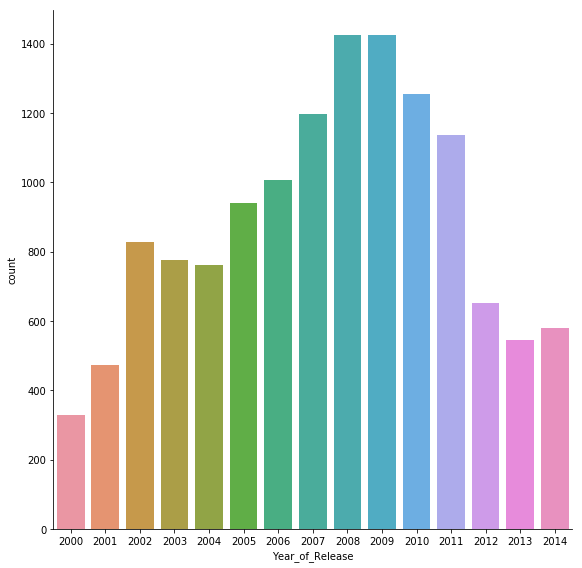

In [166]:
years=np.arange(2000, 2015)
games_per_year = sns.factorplot(x='Year_of_Release', data=vg, kind='count', order=years, height=8)


Interestingly, the count decreases after 2009. Next, lets separate the count by 'Gen_Platform'.

Text(0,0.5,'Game Count')

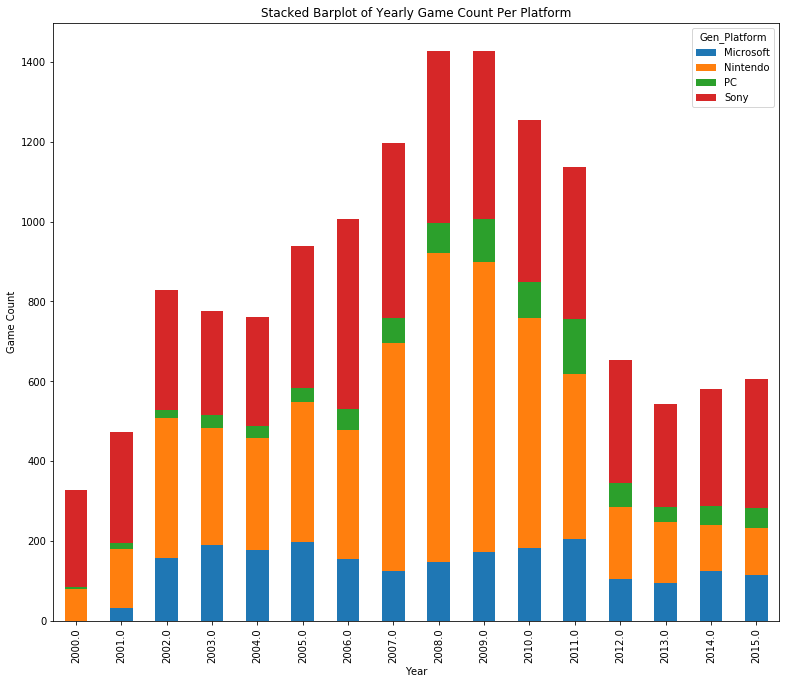

In [167]:
df_plot = vg.groupby(['Gen_Platform', 'Year_of_Release']).size().reset_index().pivot(columns='Gen_Platform', index='Year_of_Release', values=0)
df_plot = df_plot.fillna(0)
df_plot.plot(kind='bar', stacked=True, figsize=(13,11))
plt.title('Stacked Barplot of Yearly Game Count Per Platform')
plt.xlabel('Year')
plt.ylabel('Game Count')

From this plot, we can make a few observations:
* From 1983 to 1994, Nintendo made the most games.
* From 1995 to 2007, Nintendo and Sony created about the same amount of games.
* Nintendo's game production peaked in 2008 and 2009, which are the years following the release of the Wii(November 2006).
* Microsoft started making games much later than Sony and Nintendo.

## 3.2 Sales Per Year
Create a plot for global sales per year and global sales per platform per year. 

Text(0,0.5,'Sales (Millions)')

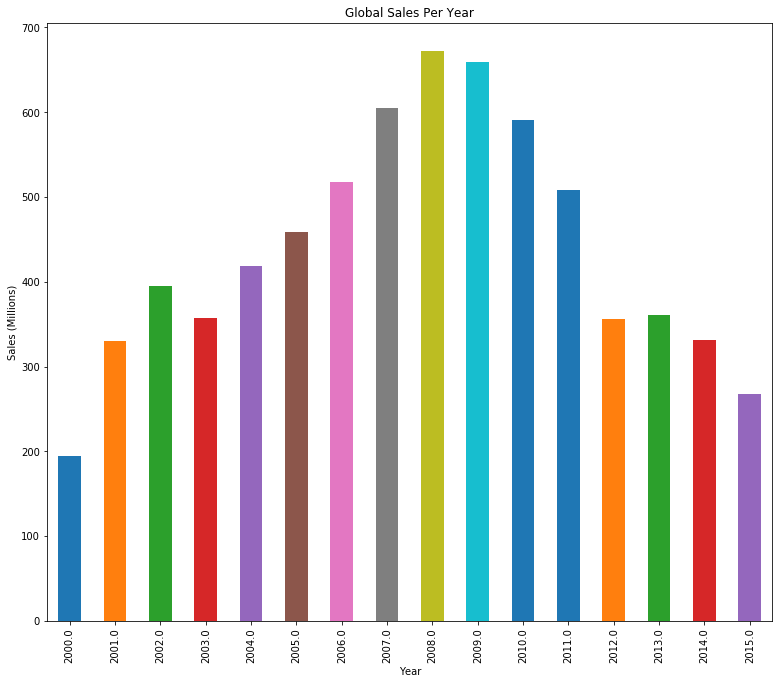

In [168]:
sales = vg.groupby('Year_of_Release').Global_Sales.sum()
sales.plot(kind='bar', figsize=(13,11))
plt.title('Global Sales Per Year')
plt.xlabel('Year')
plt.ylabel('Sales (Millions)')

Text(0,0.5,'Sales (Millions)')

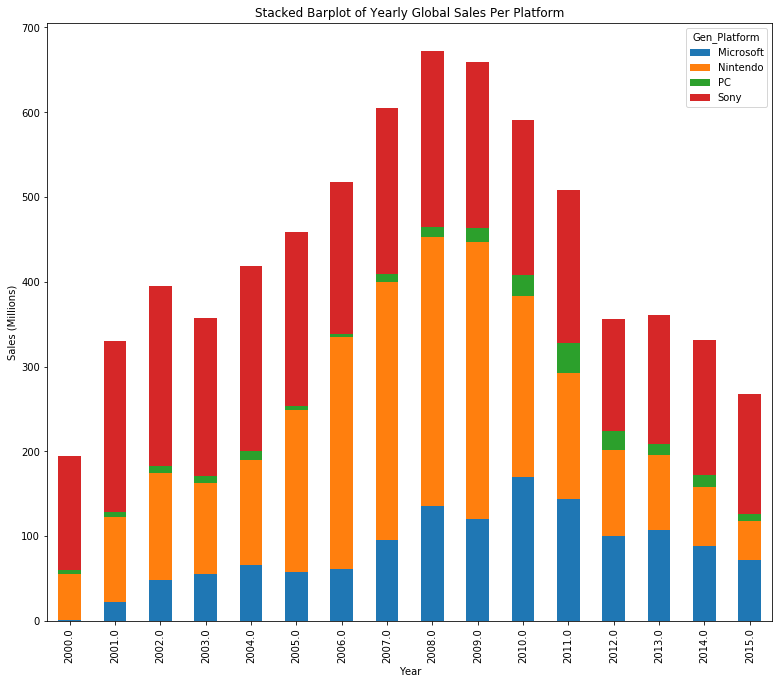

In [169]:
df_plot = vg.groupby(['Year_of_Release','Gen_Platform']).Global_Sales.sum()
df_plot = df_plot.fillna(0)
df_plot.unstack().plot(kind='bar', stacked=True, figsize=(13,11))
plt.title('Stacked Barplot of Yearly Global Sales Per Platform')
plt.xlabel('Year')
plt.ylabel('Sales (Millions)')

The sales per platform and game count per platform are roughly the same but to better visualize the average sales per game each year, plot the sales/game count for each year.
## 3.3 Sales Per Game Count Trends

In [170]:
vgSalesPerGame =  vg.groupby(['Year_of_Release', 'Gen_Platform'])
count = vgSalesPerGame.size().to_frame('count')
count.head()

count
Year_of_Release Gen_Platform       
2000.0          Microsoft         1
                Nintendo         78
                PC                7
                Sony            242
2001.0          Microsoft        33

In [171]:
df = (count.join(vgSalesPerGame.agg({'Global_Sales': 'sum'})).reset_index())
df['Sale_Per_Game'] = df['Global_Sales']/df['count']
df = df.convert_objects(convert_numeric=True)
df.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until


,Year_of_Release,Gen_Platform,count,Global_Sales,Sale_Per_Game
0,2000.0,Microsoft,1,0.99,0.990000
1,2000.0,Nintendo,78,53.83,0.690128
2,2000.0,PC,7,4.68,0.668571
3,2000.0,Sony,242,135.41,0.559545
4,2001.0,Microsoft,33,22.24,0.673939


Use describe and groupby to see the average sales per game of each platform

In [172]:
df[df['Gen_Platform'] == 'Nintendo'].describe()

,Year_of_Release,count,Global_Sales,Sale_Per_Game
count,16.000000,16.000000,16.000000,16.000000
mean,2007.500000,340.875000,162.024375,0.510987
std,4.760952,219.789862,96.513240,0.143616
min,2000.000000,78.000000,45.280000,0.360085
25%,2003.750000,151.750000,97.430000,0.380314
50%,2007.500000,309.000000,125.320000,0.490340
75%,2011.250000,451.750000,228.290000,0.582303
max,2015.000000,774.000000,326.540000,0.844691


In [173]:
df[df['Gen_Platform'] == 'Sony'].describe()

,Year_of_Release,count,Global_Sales,Sale_Per_Game
count,16.000000,16.000000,16.000000,16.000000
mean,2007.500000,339.625000,180.365000,0.549668
std,4.760952,75.008333,28.081256,0.127788
min,2000.000000,242.000000,131.240000,0.378568
25%,2003.750000,275.500000,157.997500,0.449442
50%,2007.500000,315.000000,184.665000,0.513603
75%,2011.250000,410.000000,202.597500,0.619386
max,2015.000000,475.000000,218.890000,0.798869


In [174]:
df[df['Gen_Platform'] == 'Microsoft'].describe()

,Year_of_Release,count,Global_Sales,Sale_Per_Game
count,16.000000,16.000000,16.000000,16.000000
mean,2007.500000,136.375000,84.070625,0.672749
std,4.760952,57.544041,45.044171,0.274497
min,2000.000000,1.000000,0.990000,0.291574
25%,2003.750000,112.750000,56.870000,0.391595
50%,2007.500000,151.000000,80.480000,0.699020
75%,2011.250000,178.250000,110.710000,0.924596
max,2015.000000,206.000000,170.080000,1.143830


In [175]:
df[df['Gen_Platform'] == 'PC'].describe()

,Year_of_Release,count,Global_Sales,Sale_Per_Game
count,16.000000,16.000000,16.000000,16.000000
mean,2007.500000,53.937500,12.579375,0.277484
std,4.760952,35.131123,8.615967,0.150253
min,2000.000000,7.000000,2.910000,0.055962
25%,2003.750000,32.250000,7.790000,0.163823
50%,2007.500000,48.500000,9.870000,0.270333
75%,2011.250000,65.500000,14.210000,0.352083
max,2015.000000,139.000000,35.100000,0.668571


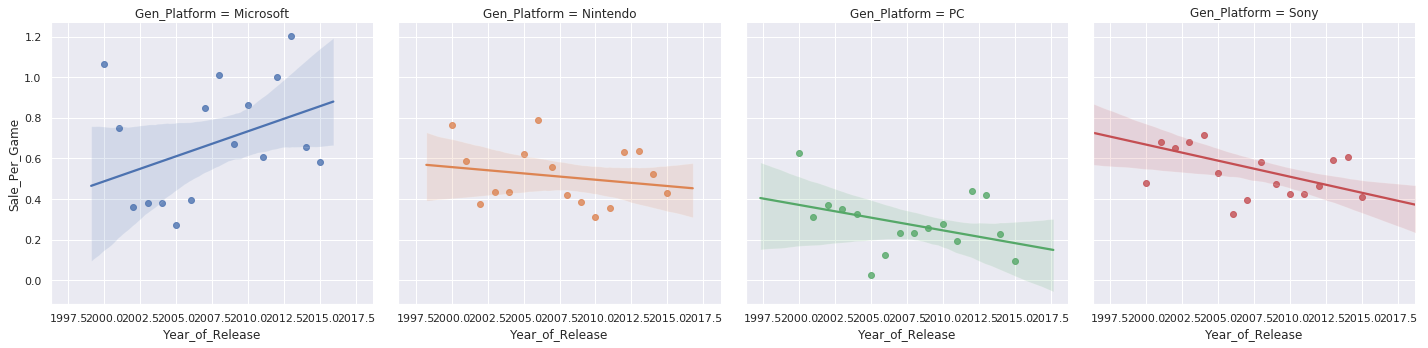

In [195]:
plot = sns.lmplot(x='Year_of_Release', y='Sale_Per_Game', col='Gen_Platform', hue='Gen_Platform', data = df, y_jitter=.1,)

Observations
* Microsoft is the only platform with an increasing trend of sales per game.
* Nintendo has a roughly flat trend and Sony has the largest decreasing trend.<br><br>
The data may be biased towards sales of games released in earlier years because older games have more time to be purchased. Older games can be purchased years after the release, though sales decrease as the game gets older, whereas newer games have only been out for a few years. Because of this, I would expect the actual trend to be more positive than the trends shown above. According to [Forbes](https://www.forbes.com/sites/kevinanderton/2017/04/25/the-business-of-video-games-how-much-is-being-spent-and-why-infographic/#2c1f38fe6fe8), videogame spending has spending in the United States has grown from 17.5 billion to 24.5 billion from 2010 to 2016. So even though video game sales and sales per game are decreasing, people are still spending more money, which means the data must be missing something. My guess is that it is due to the increase of in game purchases such a downloadable content and loot boxes which would increase revenue for a game without effecting the sales quantity.


## 3.4 Genre Distribution
Next, plot the distribution of genres for all games and for each platform

In [222]:
genre_count = vg.groupby('Genre').Name.count()
genre_count

Genre
Action          2899
Adventure       1130
Fighting         617
Misc            1565
Platform         704
Puzzle           478
Racing          1008
Role-Playing    1240
Shooter         1080
Simulation       750
Sports          1927
Strategy         535
Name: Name, dtype: int64

Text(0.5,1,'Pie Chart of Genre Distribution')

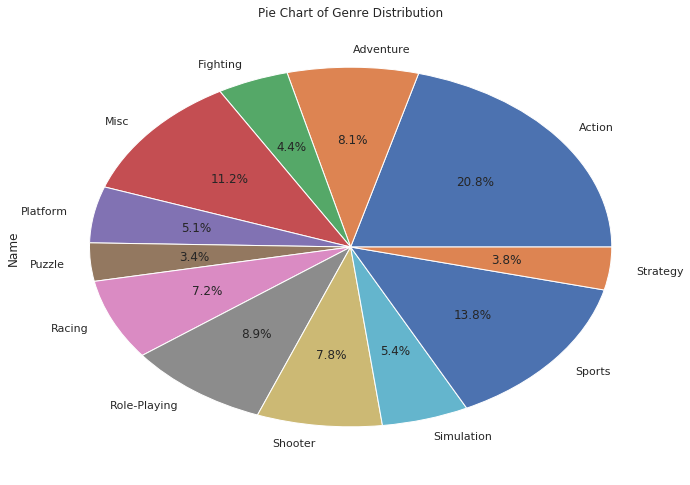

In [223]:
genre_count.plot(kind='pie',  autopct='%1.1f%%')
plt.title('Pie Chart of Genre Distribution')

Text(0.5,1,'Pie Chart of Genre Distribution of Sony')

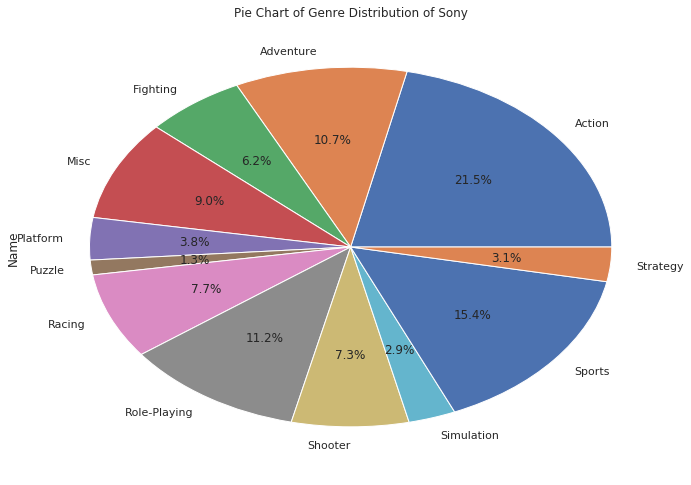

In [224]:
genre_count = vg[vg['Gen_Platform'] == 'Sony'].groupby('Genre').Name.count()
genre_count.plot(kind='pie',  autopct='%1.1f%%')
plt.title('Pie Chart of Genre Distribution of Sony')

Text(0.5,1,'Pie Chart of Genre Distribution of Nintendo')

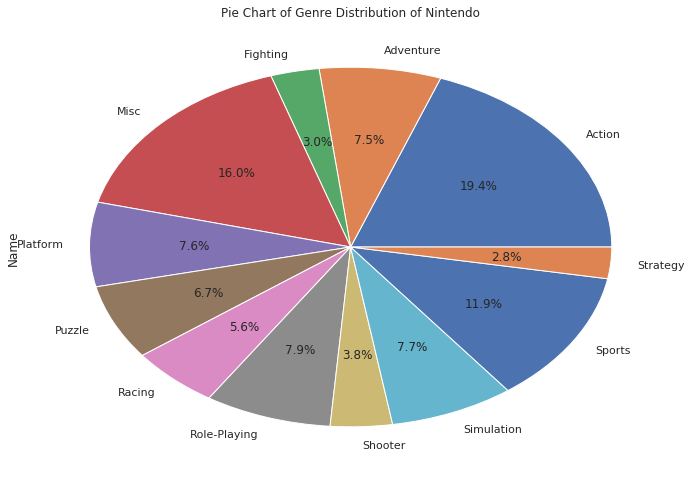

In [225]:
genre_count = vg[vg['Gen_Platform'] == 'Nintendo'].groupby('Genre').Name.count()
genre_count.plot(kind='pie',  autopct='%1.1f%%')
plt.title('Pie Chart of Genre Distribution of Nintendo')

Text(0.5,1,'Pie Chart of Genre Distribution of Microsoft')

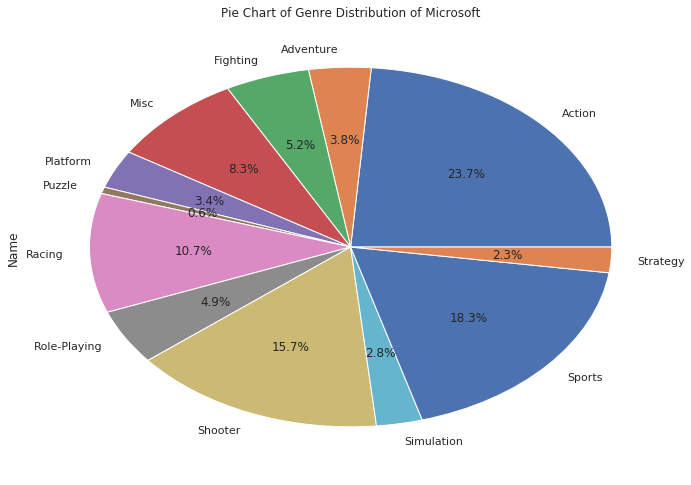

In [226]:
genre_count = vg[vg['Gen_Platform'] == 'Microsoft'].groupby('Genre').Name.count()
genre_count.plot(kind='pie',  autopct='%1.1f%%')
plt.title('Pie Chart of Genre Distribution of Microsoft')

Text(0.5,1,'Pie Chart of Genre Distribution of PC')

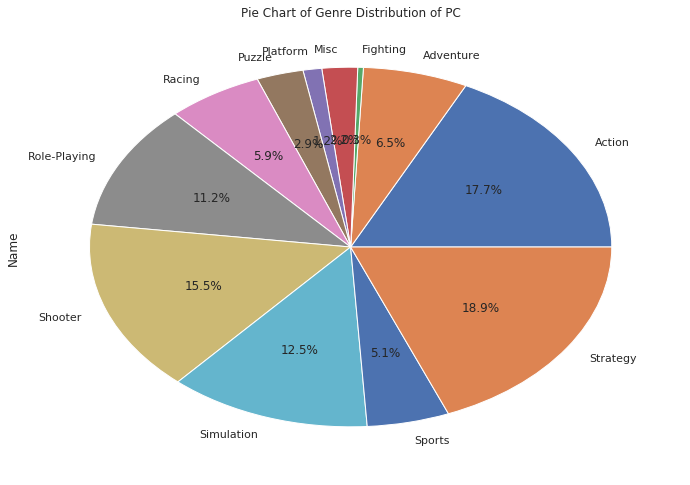

In [227]:
genre_count = vg[vg['Gen_Platform'] == 'PC'].groupby('Genre').Name.count()
genre_count.plot(kind='pie',  autopct='%1.1f%%')
plt.title('Pie Chart of Genre Distribution of PC')

Observations
* Action and sports are the most popular genre.
* Sony makes fewer platform, puzzle, and strategy with puzzle being significantly lower.
* Nintendo makes more puzzle and paltform games and fewer shooters.
* Microsoft has the highest percentage for action, sports, and shooter games.
* Microsoft has the lowest percentage of puzzle games.
* Strategy is the largest percentage in the PC distribution even though strategy is the second smallest percentage in the overall genre distribution

## 3.5 Genre Sales Per Region
Create pie charts to show the distribution of game sales in each region (NA, EU, and JP) for each genre.

In [238]:
genre_sales = vg.groupby('Genre').sum().T
genre_sales = genre_sales.drop('Year_of_Release')
genre_sales = genre_sales.drop('Global_Sales')
genre_sales = genre_sales.drop('Critic_Score')
genre_sales = genre_sales.drop('Critic_Count')
genre_sales = genre_sales.drop('User_Score')
genre_sales = genre_sales.drop('User_Count')
genre_sales

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
NA_Sales,742.57,81.18,158.93,364.51,256.26,64.15,270.48,276.41,478.99,162.01,580.83,45.83
EU_Sales,455.67,48.18,73.17,196.05,138.61,39.74,189.74,151.41,278.12,103.43,327.52,31.96
JP_Sales,124.65,35.00,43.36,84.39,55.04,24.18,27.41,233.66,22.15,39.83,74.64,27.28
Other_Sales,171.98,14.40,31.19,70.80,41.16,10.12,68.63,50.12,95.15,28.25,123.03,8.67


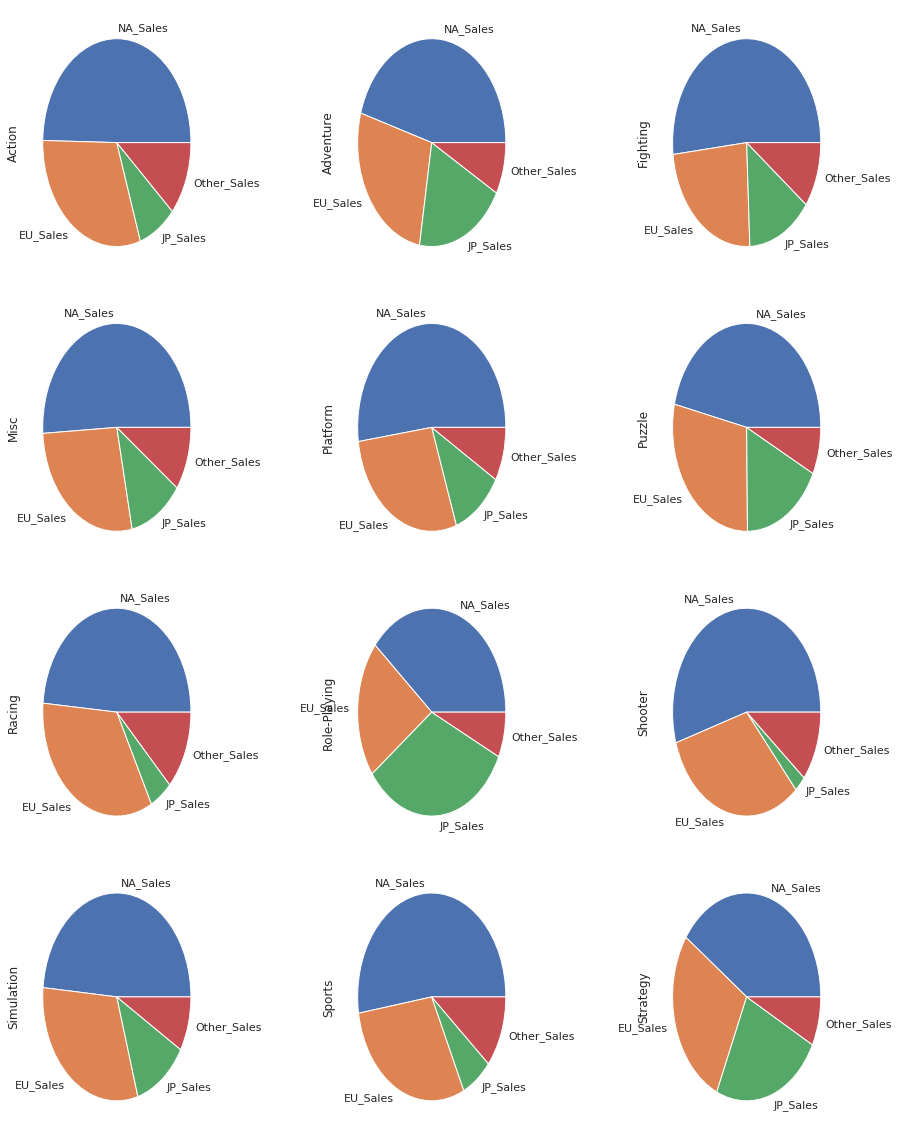

In [262]:
genre_sales.plot.pie(subplots=True, figsize=(12, 16), layout=(4,3), legend=False)
plt.tight_layout()
plt.subplots_adjust(wspace=.7)

Observations
* NA sales are roughly half for each genre.
* JP sales are significantly low for the genres racing, shooter, and sports and higher for role playing and strategy. 
* NA has less than 50% for adventure, puzzle, role playing, and strategy

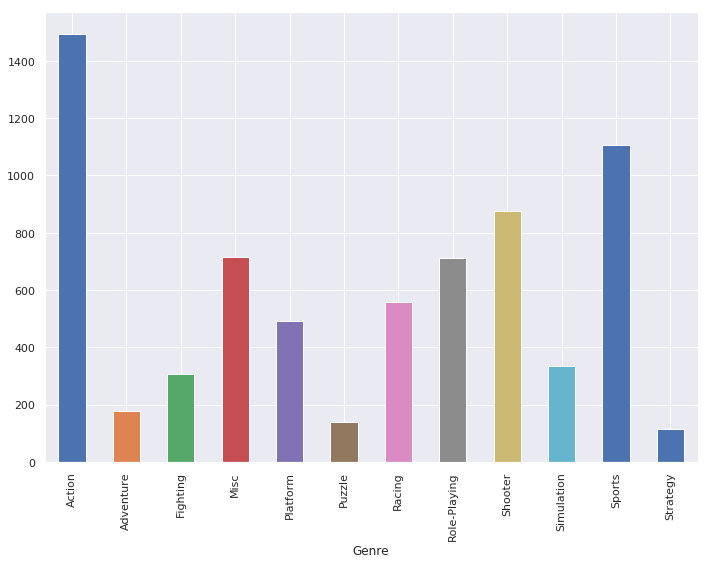

In [265]:
genre_sales.sum().plot(kind='bar')

## 3.6 Critic and User Score Trends
Lastly, lets plot critic and user score over time to see if there is a trend. 

Text(0.5,1,'Critic Scores Trend')

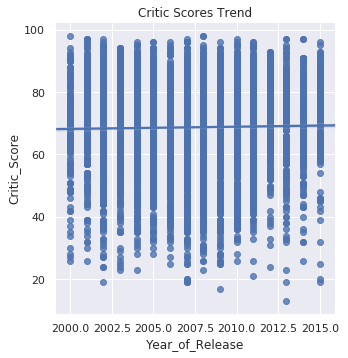

In [277]:
plot = sns.lmplot(x='Year_of_Release', y='Critic_Score', data = vg)
plt.title('Critic Scores Trend')

Text(0.5,1,'User Scores Trend')

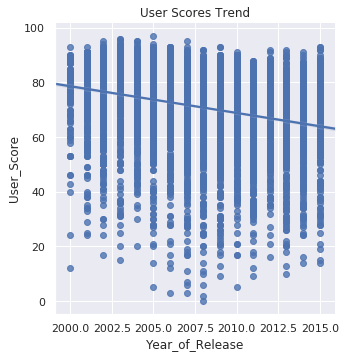

In [278]:
plot = sns.lmplot(x='Year_of_Release', y='User_Score', data = vg)
plt.title('User Scores Trend')

As expected, the trend for critic scores is roughly flat. However, user scores are decreasing over time. This could be because users are expecting more out of games as they play more games but it is hard to say for sure without more data.

# 4. Conclusion

Over the course of this analysis, we looked at the competition between the 4 major platforms. We saw that the number of videogames and global sales increased until 2008/2009 then started to decrease. The stacked bar plots for number of games and global sales showed that Sony and Nintendo are the dominant platforms. Then we looked at the sales per game over time and saw a decreasing trend. However, there are fundamental problems with the data, such as newer games having less time to sell and using global sales which is the number of copies instead of using revenue. Then we plotted the distribution of genres and the distribution of sales in each region. Lastly we saw that user reviews of games are decreasing over time.